# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

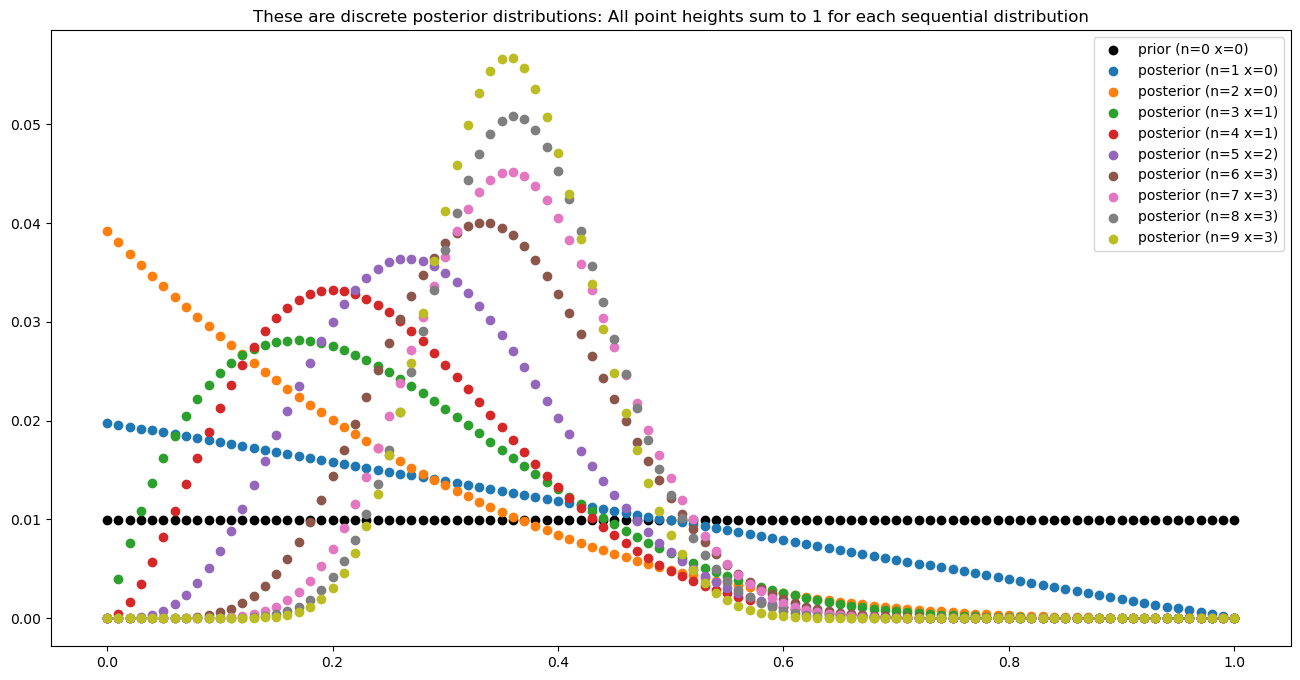

In [1]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
from scipy.stats import binom

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

# Starting with the prior
posterior = prior 
for observation in observations:
    n += 1  
    x += observation
    likelihood = binom.pmf(x, n, parameter_domain)
    
    # Update posterior
    posterior = likelihood * posterior
    posterior /= posterior.sum()
    
    plt.scatter(parameter_domain, posterior, label="posterior (n=" + str(n) + " x=" + str(x) + ")")
    
    
plt.legend()
plt.show()


### Q2

1. Since it follows $\theta^{\alpha-1}(1-\theta)^{\beta-1}$, which indicates that it's a beta distribution; such that we know it's parameters: $p(\theta_j|x_j,n_j) \sim Beta(\alpha+x_{j}, \beta + n_{j} - x_{j})$

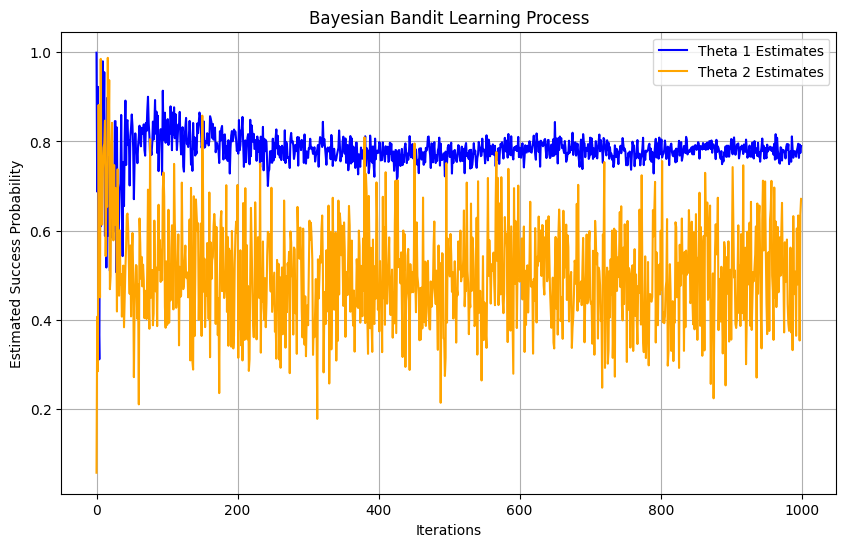

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define true success rates
theta1_true, theta2_true = 0.8, 0.4

alpha, beta_param = 1, 1

n1, x1 = 0, 0
n2, x2 = 0, 0

iterations = 1000

# Lists for means
theta1_values = []
theta2_values = []

for _ in range(iterations):
    theta1_sample = np.random.beta(alpha + x1, beta_param + n1 - x1)
    theta2_sample = np.random.beta(alpha + x2, beta_param + n2 - x2)

    theta1_values.append(theta1_sample)
    theta2_values.append(theta2_sample)

    if theta1_sample > theta2_sample:
        result = np.random.rand() < theta1_true  
        x1 += result
        n1 += 1
    else:
        result = np.random.rand() < theta2_true
        x2 += result
        n2 += 1

# Plot
plt.figure(figsize=(10, 6))
plt.plot(theta1_values, label="Theta 1 Estimates", color='blue')
plt.plot(theta2_values, label="Theta 2 Estimates", color='orange')
plt.xlabel('Iterations')
plt.ylabel('Estimated Success Probability')
plt.legend()
plt.title('Bayesian Bandit Learning Process')
plt.grid()
plt.show()

### Q3

It is better to use Beta-Binomial since the goal is to find the best arm with minimal regret and the arms are independent from each other; such that we can treat each one seperately. On the other hand, if the performance of each bandit impacts each other, it will be better to use Dirichlet-Nultinomial approach. 

First, when we have three independent bandits with different probability of winning, in such case, we shall use Beta-Binomial approach. 

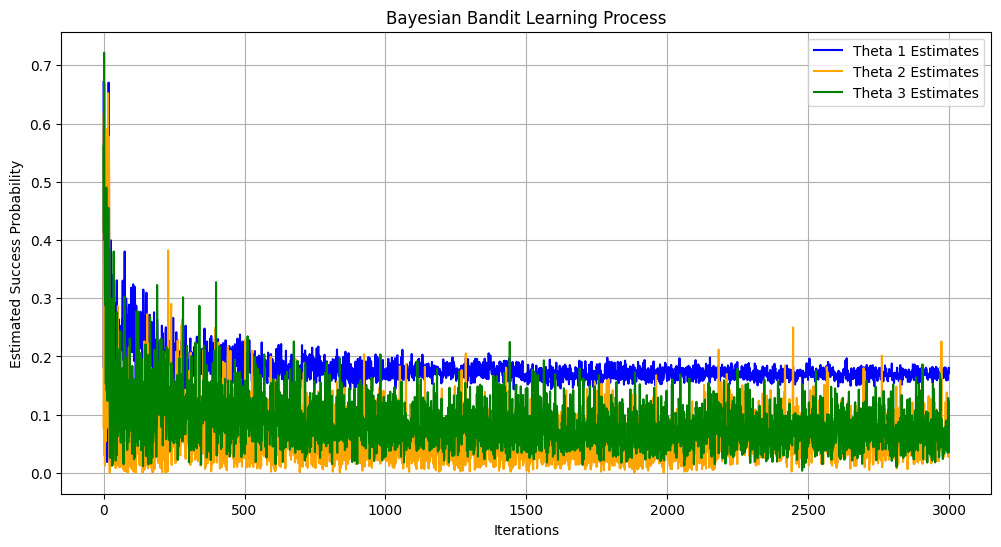

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define true success rates
theta1_true, theta2_true, theta3_true = 0.16, 0.08, 0.04

alpha, beta_param = 1, 1

n1, x1 = 0, 0
n2, x2 = 0, 0
n3, x3 = 0, 0

iterations = 3000

# Lists for means
theta1_values = []
theta2_values = []
theta3_values = []

for _ in range(iterations):
    theta1_sample = np.random.beta(alpha + x1, beta_param + n1 - x1)
    theta2_sample = np.random.beta(alpha + x2, beta_param + n2 - x2)
    theta3_sample = np.random.beta(alpha + x3, beta_param + n3 - x3)


    theta1_values.append(theta1_sample)
    theta2_values.append(theta2_sample)
    theta3_values.append(theta3_sample)

    if theta1_sample >= theta2_sample and theta1_sample >= theta3_sample:
        result = np.random.rand() < theta1_true  
        x1 += result
        n1 += 1
    elif theta2_sample >= theta1_sample and theta2_sample >= theta3_sample:
        result = np.random.rand() < theta2_true
        x2 += result
        n2 += 1
    else:
        result = np.random.rand() < theta3_true
        x3 += result
        n3 += 1

# Plot
plt.figure(figsize=(12, 6))
plt.plot(theta1_values, label="Theta 1 Estimates", color='blue')
plt.plot(theta2_values, label="Theta 2 Estimates", color='orange')
plt.plot(theta3_values, label="Theta 3 Estimates", color='green')
plt.xlabel('Iterations')
plt.ylabel('Estimated Success Probability')
plt.legend()
plt.title('Bayesian Bandit Learning Process')
plt.grid()
plt.show()

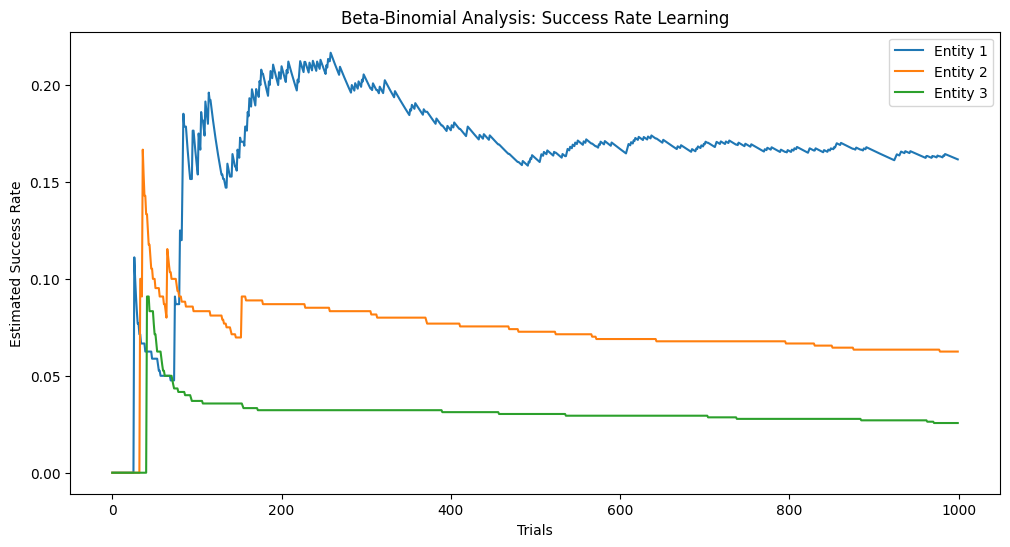

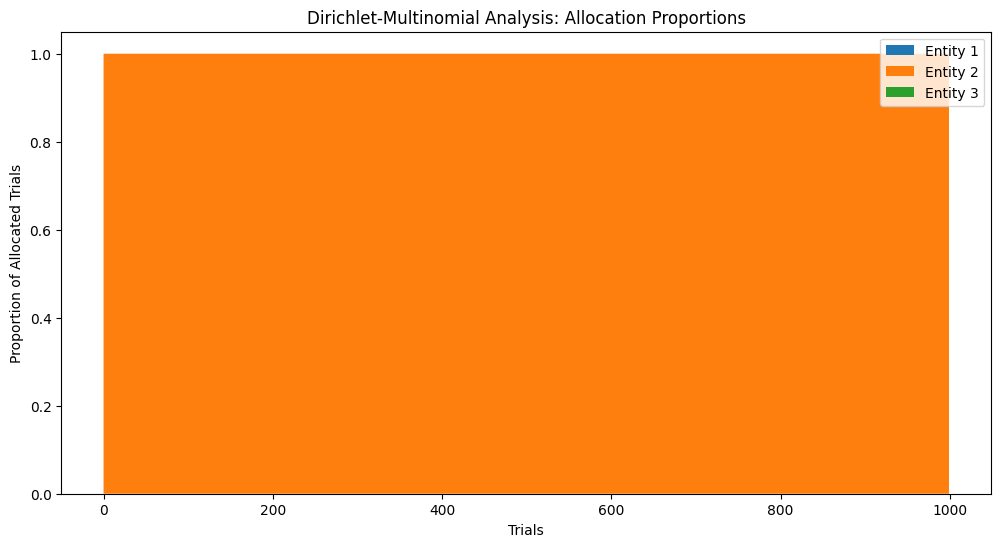

In [111]:
# Re-import necessary libraries after reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

theta_true = [0.16, 0.08, 0.04]
num_entities = len(theta_true)
iterations = 1000

# Beta-Binomial Analysis
alpha_beta = np.ones(num_entities)
beta_params = np.ones(num_entities)
x_success = np.zeros(num_entities)
n_trials = np.zeros(num_entities)

beta_history = np.zeros((num_entities, iterations))

for t in range(iterations):
    sampled_probs = [beta.rvs(alpha_beta[j] + x_success[j], beta_params[j] + n_trials[j] - x_success[j])
                                for j in range(num_entities)]
    chosen_entity = np.argmax(sampled_probs)
    outcome = np.random.rand() < theta_true[chosen_entity]
    x_success[chosen_entity] += outcome
    n_trials[chosen_entity] += 1

    for j in range(num_entities):
        beta_history[j, t] = x_success[j] / (n_trials[j] + 1e-5)

# Dirichlet-Multinomial Analysis
alpha_dirichlet = np.ones(num_entities) * 2
dirichlet_counts = np.zeros(num_entities)

dirichlet_history = np.zeros((num_entities, iterations))

for t in range(iterations):
    sampled_probs = dirichlet.rvs(alpha_dirichlet + dirichlet_counts).flatten()
    chosen_entity = np.argmax(sampled_probs)
    outcome = np.random.rand() < theta_true[chosen_entity]
    dirichlet_counts[chosen_entity] += outcome
    dirichlet_history[:, t] = dirichlet_counts / np.sum(dirichlet_counts + 1e-5)


# Beta-Binomial
plt.figure(figsize=(12, 6))
for j in range(num_entities):
    plt.plot(beta_history[j], label=f'Entity {j+1}')
plt.title('Beta-Binomial Analysis: Success Rate Learning')
plt.xlabel('Trials')
plt.ylabel('Estimated Success Rate')
plt.legend()
plt.show()

# Dirichlet-Multinomial
plt.figure(figsize=(12, 6))
plt.stackplot(range(iterations), dirichlet_history, labels=[f'Entity {j+1}' for j in range(num_entities)])
plt.title('Dirichlet-Multinomial Analysis: Allocation Proportions')
plt.xlabel('Trials')
plt.ylabel('Proportion of Allocated Trials')
plt.legend()
plt.show()


According to the plots, we shall notice that beta-binomial approach has successfully found out that the largest probability is entity 1, while Dirichlet-Multinomial is having some issue, the first several observations has led it to a wrong way. 